In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('teen_phone_addiction_dataset (1).csv')
df.head(10)


,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
5,6,Mary Adams,13,Female,East Angelachester,10th,3.9,6.3,89,3,...,1.1,135,8,3.8,0.0,1.4,Social Media,7,6.0,8.8
6,7,Hailey Moses,16,Male,North Jeffrey,11th,6.3,6.7,89,3,...,0.8,129,9,1.8,2.7,1.0,Education,7,7.8,10.0
7,8,Veronica Marshall,13,Other,Jenniferport,10th,5.1,6.1,70,2,...,1.0,34,7,2.3,1.6,0.5,Browsing,9,8.0,8.0
8,9,Edward Avila,13,Male,Leebury,8th,3.0,9.1,79,0,...,0.9,70,13,2.7,2.2,1.3,Education,10,9.1,7.3
9,10,James Carter,18,Other,Prestonview,11th,3.9,5.8,89,8,...,0.9,121,13,2.7,0.4,1.0,Other,9,2.9,9.1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

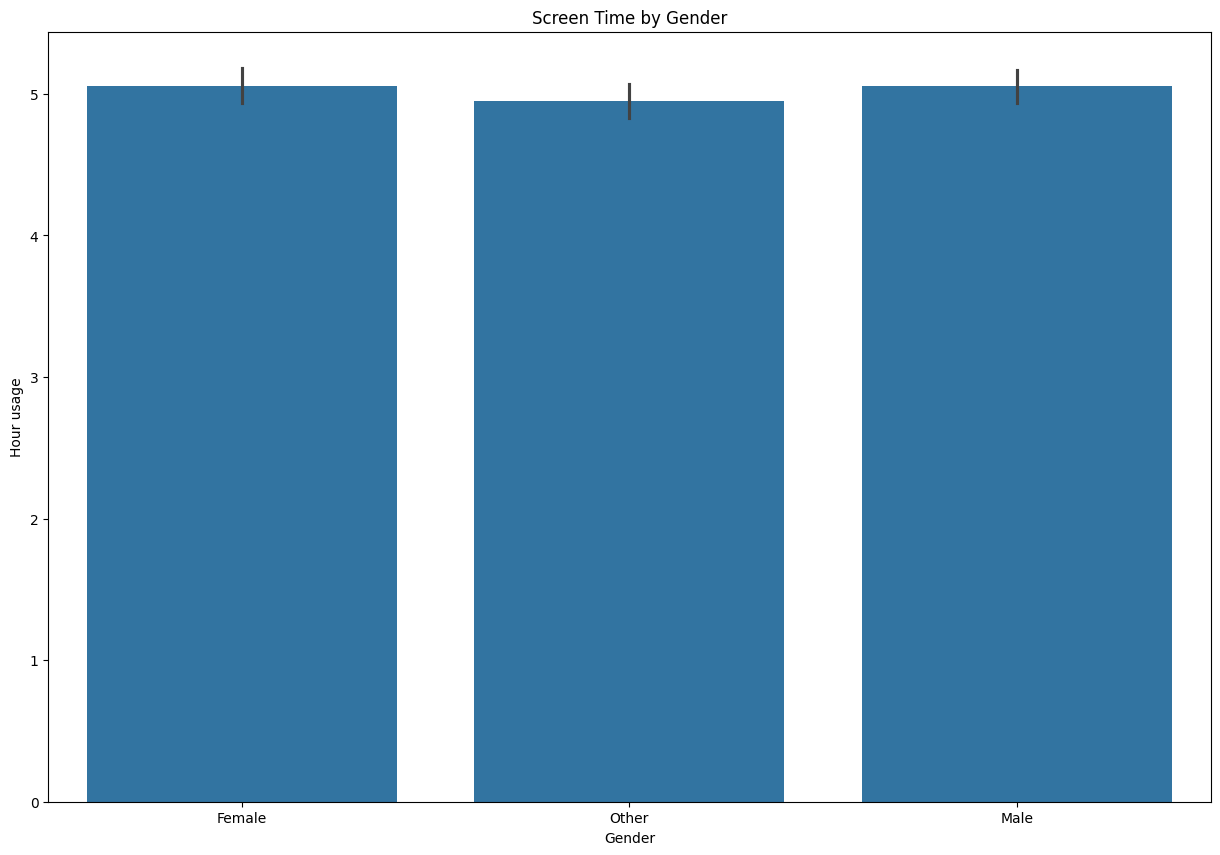

In [87]:
plt.figure(figsize=(15, 10)) 
df.groupby('Gender')['Daily_Usage_Hours'].describe()
sns.barplot(data=df, x='Gender', y='Daily_Usage_Hours')
plt.title("Screen Time by Gender")
plt.xlabel("Gender")
plt.ylabel("Hour usage")
plt.show()

Question 1: Is there a relationship of screen time by gender?
Answer: Male and female has the same count of screen time which is above 5 hours while other gender has lower than 5 hour. 



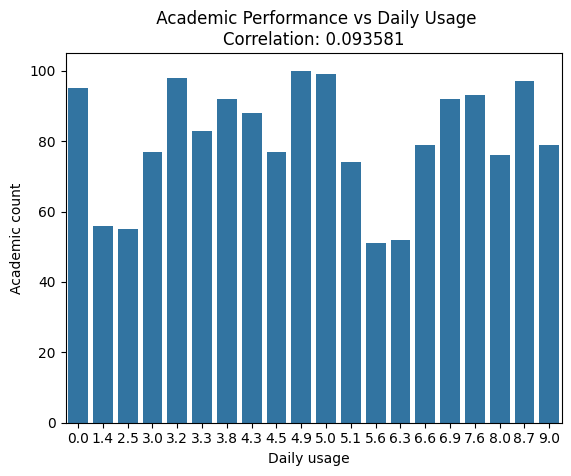

In [3]:

Sampling_df = df.sample(n = 20, random_state = 42)
corr = Sampling_df["Academic_Performance"].corr(Sampling_df['Daily_Usage_Hours'])
sns.barplot(data = Sampling_df , x = "Daily_Usage_Hours", y = 'Academic_Performance')
plt.title(f' Academic Performance vs Daily Usage\nCorrelation: {corr:2f}')
plt.xlabel("Daily usage  ")
plt.ylabel("Academic count")
plt.show()


Question 2: Is there any relationship between academic performance and daily usage?
Answer: Based on this comparison of academic performance and daily usage, there is no relationship. Students with 0 hour and 8.7 hours of screen time still perform well in academia while student more spend between 1.4,2.5 and 6.3 hours perform poorly. 

In [52]:
q3_data = df[['Daily_Usage_Hours', 'Time_on_Social_Media','Time_on_Gaming', 'Time_on_Education']]
q3_data.head(10)

,Daily_Usage_Hours,Time_on_Social_Media,Time_on_Gaming,Time_on_Education
0,4.0,3.6,1.7,1.2
1,5.5,1.1,4.0,1.8
2,5.8,0.3,1.5,0.4
3,3.1,3.1,1.6,0.8
4,2.5,2.6,0.9,1.1
5,3.9,3.8,0.0,1.4
6,6.3,1.8,2.7,1.0
7,5.1,2.3,1.6,0.5
8,3.0,2.7,2.2,1.3
9,3.9,2.7,0.4,1.0


<Axes: >

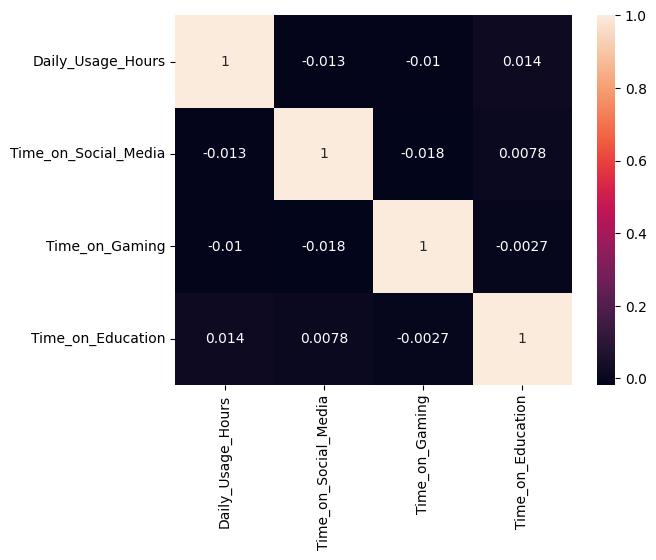

In [53]:

sns.heatmap(q3_data.corr(), annot = True, cmap = 'rocket')

Question 3:  Is there any correlation of student spending time between social media, gaming and school? 
Answer: Based on the heatmap, none of the data are correlated from each other, we see that daily usuage with both time on gaming and social is negative. Overall making, all the variables independent from each other. 



In [4]:

q4_data = df[['Daily_Usage_Hours', 
'Sleep_Hours', 
'Academic_Performance', 
'Social_Interactions', 
'Exercise_Hours', 
'Anxiety_Level', 
'Depression_Level', 
'Self_Esteem', 
'Parental_Control', 
'Screen_Time_Before_Bed', 
'Phone_Checks_Per_Day', 
'Apps_Used_Daily', 
'Time_on_Social_Media',
'Time_on_Gaming', 
'Time_on_Education' 
]]

q4_data.head(10)


,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education
0,4.0,6.1,78,5,0.1,10,3,8,0,1.4,86,19,3.6,1.7,1.2
1,5.5,6.5,70,5,0.0,3,7,3,0,0.9,96,9,1.1,4.0,1.8
2,5.8,5.5,93,8,0.8,2,3,10,0,0.5,137,8,0.3,1.5,0.4
3,3.1,3.9,78,8,1.6,9,10,3,0,1.4,128,7,3.1,1.6,0.8
4,2.5,6.7,56,4,1.1,1,5,1,0,1.0,96,20,2.6,0.9,1.1
5,3.9,6.3,89,3,0.7,7,1,3,0,1.1,135,8,3.8,0.0,1.4
6,6.3,6.7,89,3,0.9,6,7,9,0,0.8,129,9,1.8,2.7,1.0
7,5.1,6.1,70,2,2.2,5,6,8,0,1.0,34,7,2.3,1.6,0.5
8,3.0,9.1,79,0,1.8,1,7,6,0,0.9,70,13,2.7,2.2,1.3
9,3.9,5.8,89,8,1.1,9,1,9,0,0.9,121,13,2.7,0.4,1.0


<Axes: >

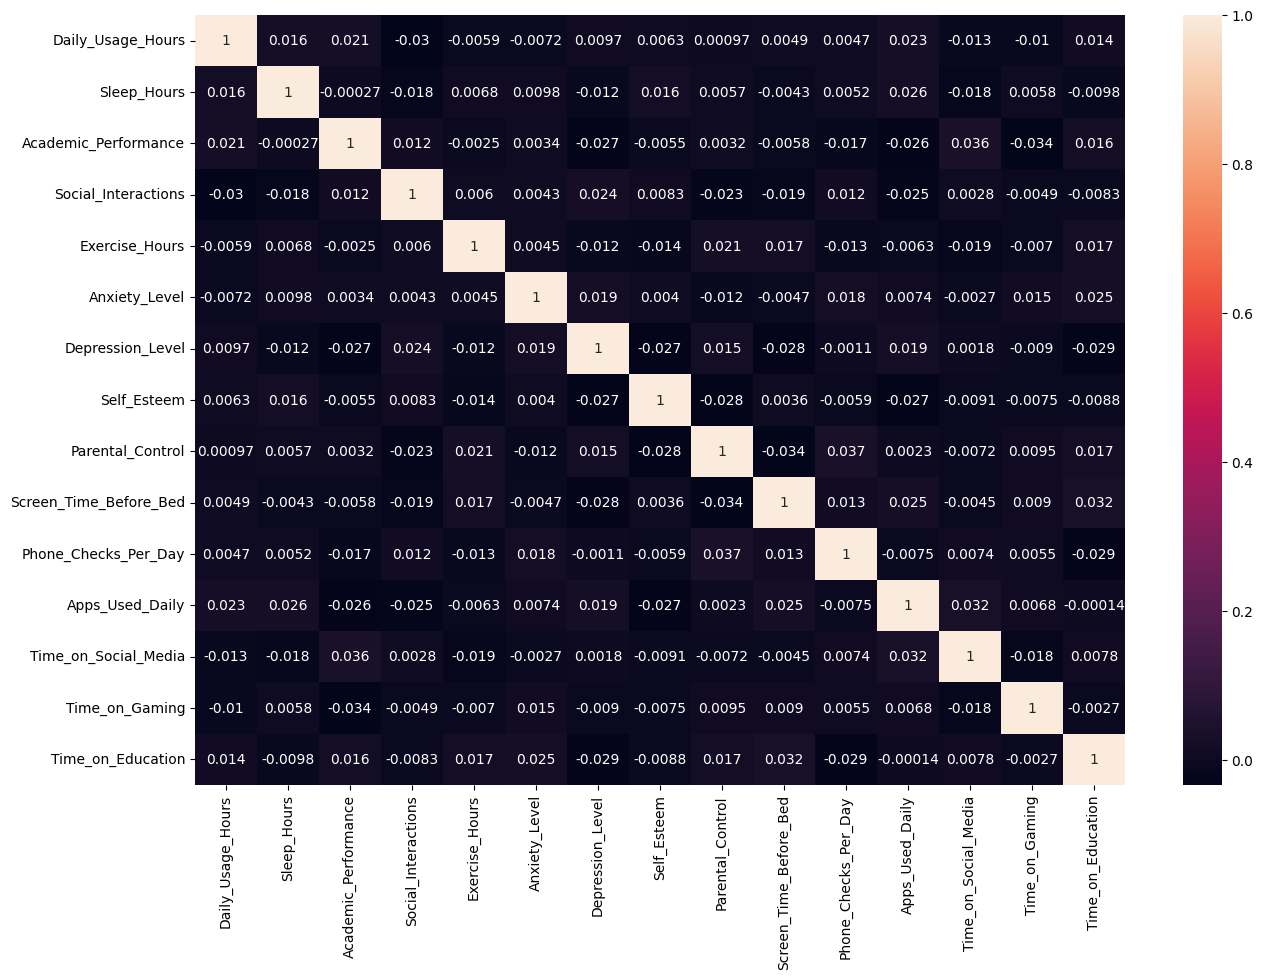

In [5]:
plt.figure(figsize=(15, 10)) 
sns.heatmap(q4_data.corr(), annot = True, cmap = 'rocket')


Question 4: Following up from last question: Is there any correlation of all numerical values in the dataset?
Answer: Following up fron last question, curious enough in using the heat map again for the all the numerical values. All the values are correlated negatively from each other, making all the data independent. Only limited to curating univariate analysis(One variable comparison).

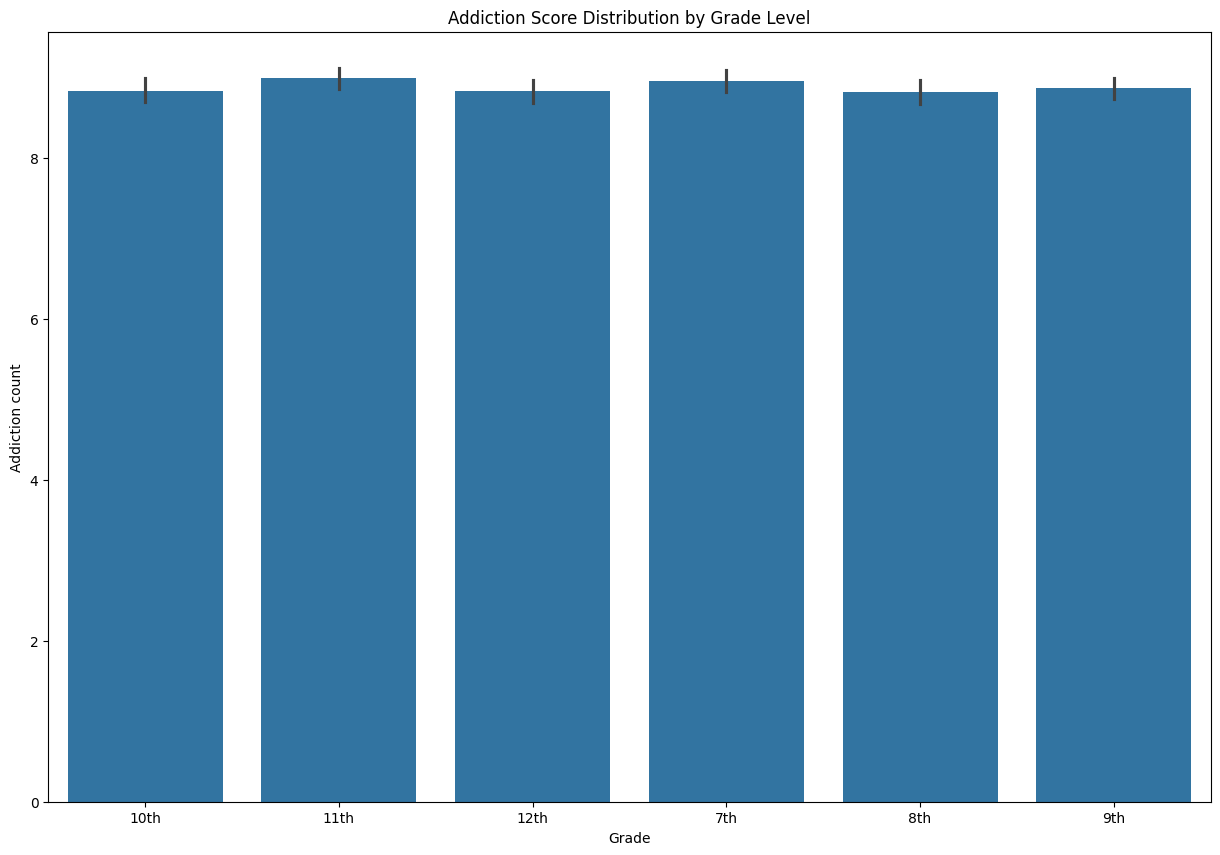

In [85]:
plt.figure(figsize=(15, 10)) 

sns.barplot(x='School_Grade', y='Addiction_Level', data=df, order=sorted(df['School_Grade'].unique()))
plt.title("Addiction Score Distribution by Grade Level")
plt.xlabel("Grade")
plt.ylabel("Addiction count")
plt.show()

Question 5:  What grade has the most count of addiction level
Answer: The grades of 11th and 7th grade has a higher addiction about over 8.5 than 10th, 7th and 8th. 


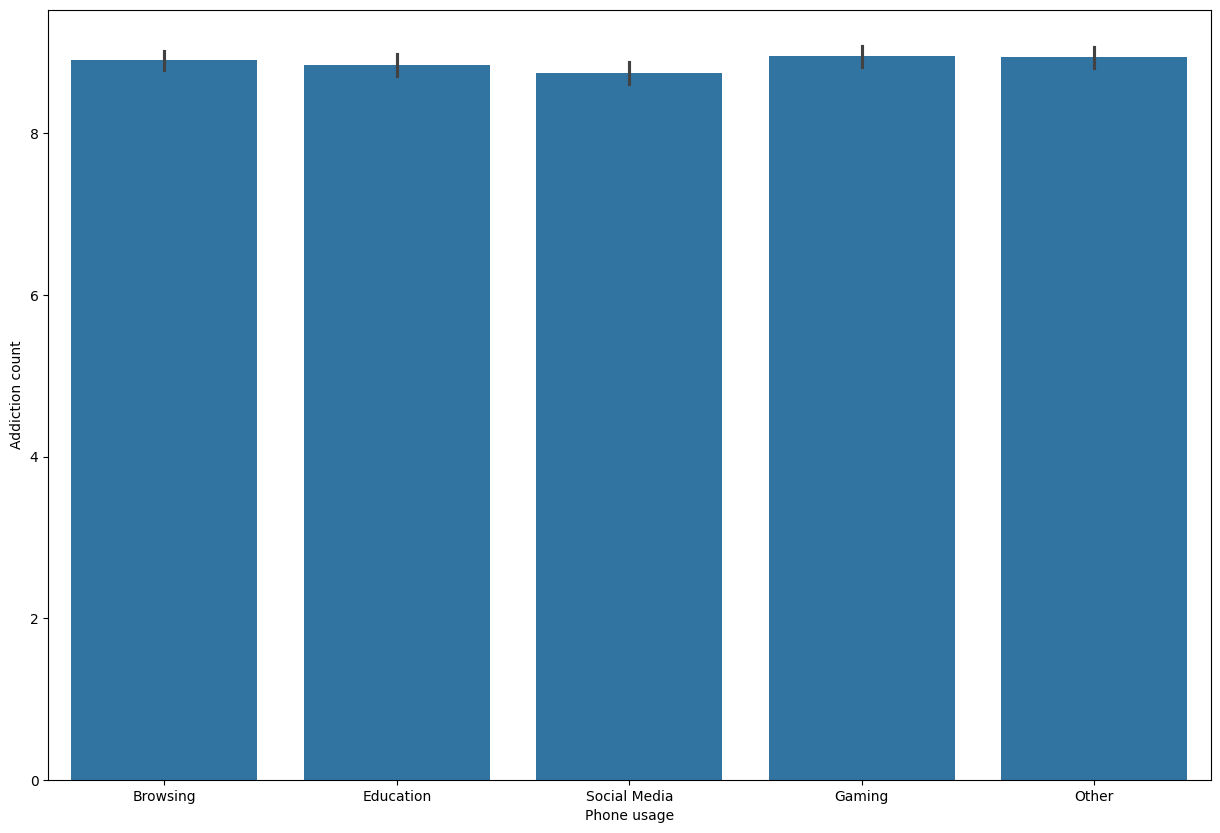

In [84]:
plt.figure(figsize=(15, 10)) 

q5 = df[['Phone_Usage_Purpose', 'Addiction_Level']]

q5.groupby('Phone_Usage_Purpose').mean()

sns.barplot(x = 'Phone_Usage_Purpose', y = 'Addiction_Level',  data = q5 , estimator='mean')
plt.xlabel("Phone usage")
plt.ylabel("Addiction count")
plt.show()

Question 6: Which phone usage category associated with the highest average addiction level among student?
Answer: Curious about the highest form of phone addiction such as browsing, education, social media, gaming and other. Browsing, education, gaming and other has the highest count over 8.4.

count    3000.000000
mean        6.489767
std         1.490713
min         3.000000
25%         5.500000
50%         6.500000
75%         7.500000
max        10.000000
Name: Sleep_Hours, dtype: float64


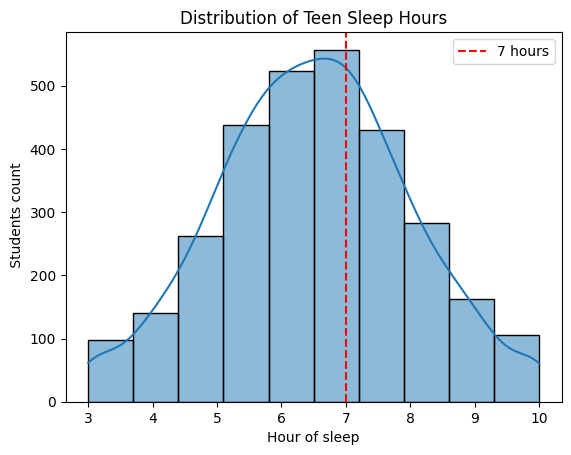

In [83]:
print(df['Sleep_Hours'].describe())

less_than_7hours = (df['Sleep_Hours'] < 7).sum()
percent = (less_than_7hours/len(df)) * 100

sns.histplot(df['Sleep_Hours'], bins=10, kde=True)
plt.axvline(7, color='red', linestyle='--', label='7 hours')
plt.title('Distribution of Teen Sleep Hours')
plt.xlabel("Hour of sleep")
plt.ylabel(" Students count")
plt.legend()
plt.show()



Question 7: How many teens sleep last than 7 hours
Answer: The diagram is symmetrical, the mean hours of sleep is 6.8(or 7). Eye balling, here is about 1110+ teen that has sleep less than 7 hours while 1060+ teen that has sleep more than 7 hours. 

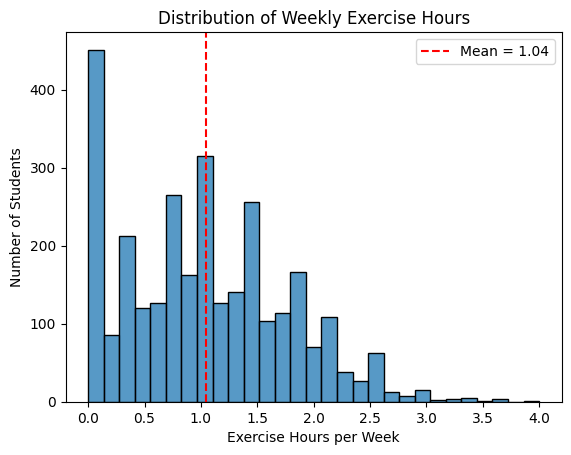

In [80]:
avg_exercise =  df['Exercise_Hours'].mean()

sns.histplot(data = df, x = "Exercise_Hours")
plt.axvline(avg_exercise, color='red', linestyle='--', label=f"Mean = {avg_exercise:.2f}")
plt.title("Distribution of hour of exercise ")
plt.xlabel("Hour of Exercise")
plt.ylabel("Number of Students")
plt.legend()
plt.show()

Question 8: What are the average number exercise hour per week?
Answer: The distribution of the graph is skewing to the right, and the mean is 1.04. There is a high count of student that doesn't exercise while low count of student which is between 10-30 that does spend time exercising. 

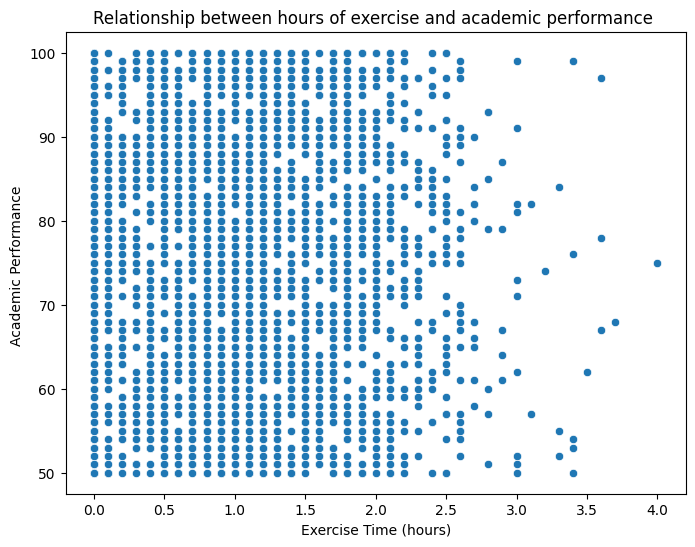

In [82]:
df[['Exercise_Hours','Academic_Performance']].corr()


plt.figure(figsize=(8,6))
sns.scatterplot(x='Exercise_Hours', y='Academic_Performance', data=df)
plt.title("Relationship between hours of exercise and academic performance ")
plt.xlabel("Exercise Time (hours)")
plt.ylabel("Academic Performance ")
plt.show()

Question 9: Is there any correlation between excerise and academic performance 
Answer: Based on the scatterplot, there does not appear to be a clear relationship between exercise hours and academic performance. Students who spend more time exercising (around 3.0–4.0 hours per week) often still perform poorly, while some students who report no exercise hours show higher performance.

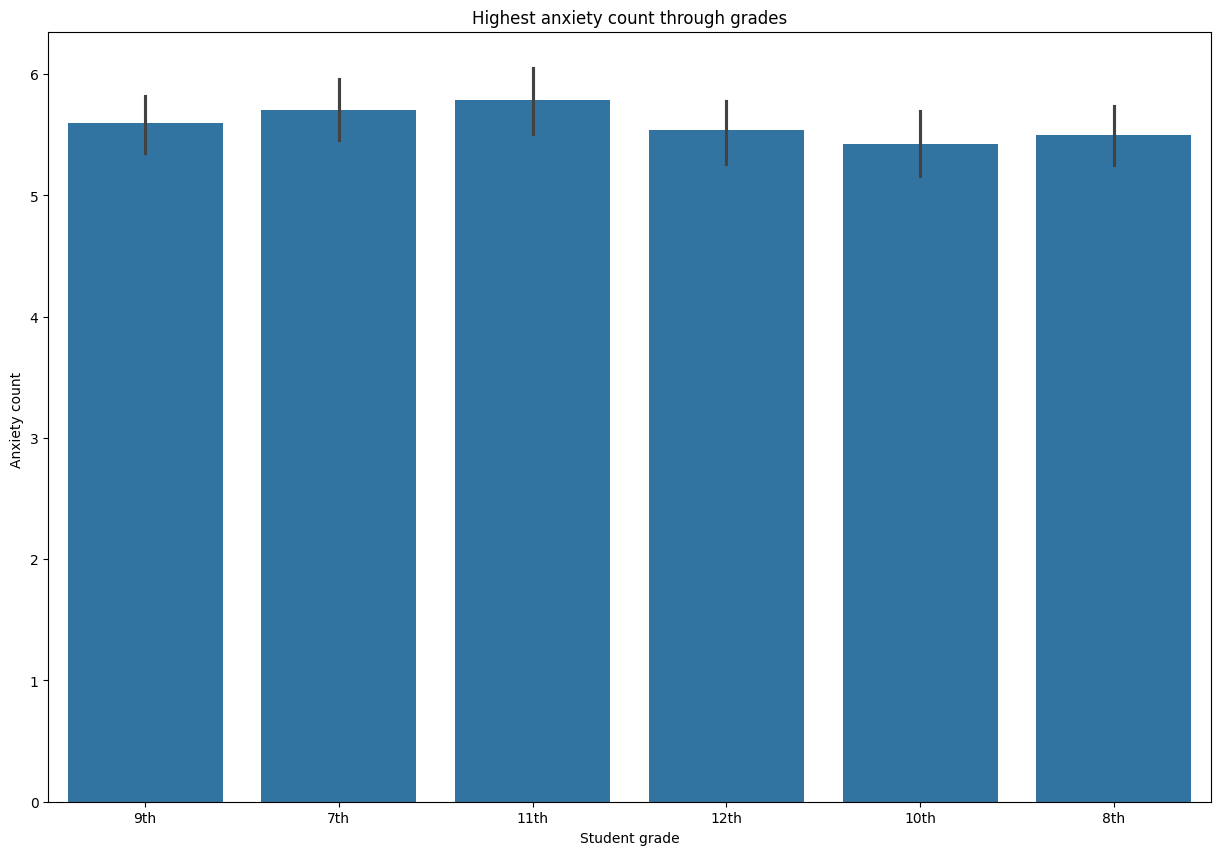

In [81]:
plt.figure(figsize=(15, 10)) 

q10 = df[['School_Grade', 'Anxiety_Level']]
q10.groupby('School_Grade').max()

sns.barplot(data= q10, x = 'School_Grade', y = 'Anxiety_Level')
plt.title("Highest anxiety count through grades")
plt.xlabel("Student grade")
plt.ylabel("Anxiety count ")
plt.show()

Question 10: Which grade has the highest anxiety count?
Answer: Based on the barchart, students that are in 11th grade has the highest anxiety being above 5.5 while 10th grade has the lowest anxiety count being below 5.5.